In [ ]:
import numpy as np
import pandas as pd

base_path = "C:/Users/ae154/Downloads/BrainTumor_1"

import os
for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-glTr_0000.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-glTr_0001.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-glTr_0002.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-glTr_0003.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-glTr_0004.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-glTr_0005.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-glTr_0006.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-glTr_0007.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-glTr_0008.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-glTr_0009.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-gl_0010.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-gl_0011.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-gl_0012.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-gl_0013.jpg
C:/Users/ae154/Downloads/BrainTumor_1\Test\glioma\Te-gl_0014.jpg
C:/Us

In [ ]:
base_path = "C:/Users/ae154/Downloads/BrainTumor_1/Train" 

categories = ["glioma", "meningioma", "notumor", "pituitary"]

In [3]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [4]:
df.head()

,image_path,label
0,C:/Users/ae154/Downloads/BrainTumor_1/Train\gl...,glioma
1,C:/Users/ae154/Downloads/BrainTumor_1/Train\gl...,glioma
2,C:/Users/ae154/Downloads/BrainTumor_1/Train\gl...,glioma
3,C:/Users/ae154/Downloads/BrainTumor_1/Train\gl...,glioma
4,C:/Users/ae154/Downloads/BrainTumor_1/Train\gl...,glioma


In [5]:
df.tail()

,image_path,label
22843,C:/Users/ae154/Downloads/BrainTumor_1/Train\pi...,pituitary
22844,C:/Users/ae154/Downloads/BrainTumor_1/Train\pi...,pituitary
22845,C:/Users/ae154/Downloads/BrainTumor_1/Train\pi...,pituitary
22846,C:/Users/ae154/Downloads/BrainTumor_1/Train\pi...,pituitary
22847,C:/Users/ae154/Downloads/BrainTumor_1/Train\pi...,pituitary


In [6]:
df.shape

(22848, 2)

In [7]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype=object)

In [10]:
df['label'].value_counts()

label
notumor       6380
pituitary     5828
meningioma    5356
glioma        5284
Name: count, dtype: int64

C:\Users\ae154\AppData\Local\Temp\ipykernel_924\1753293280.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis")


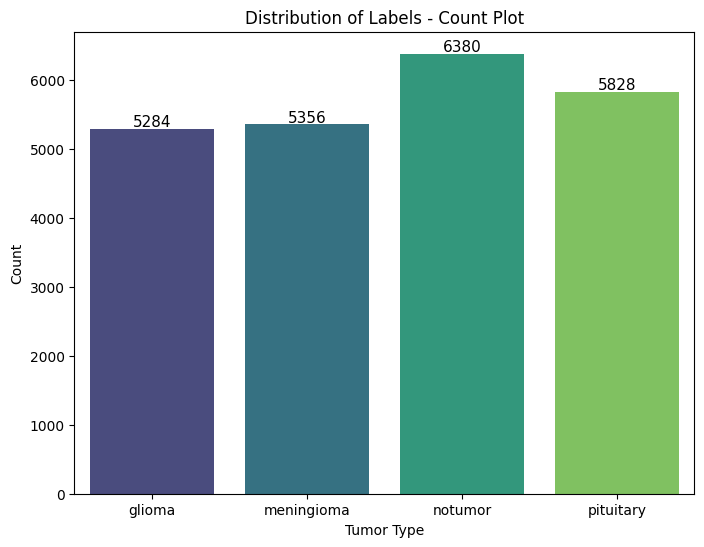

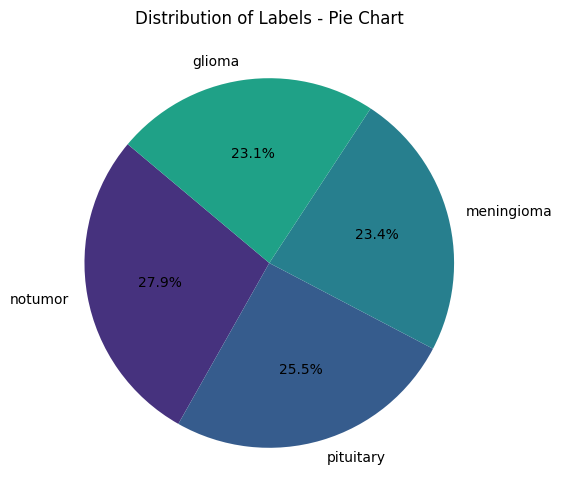

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Tumor Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()

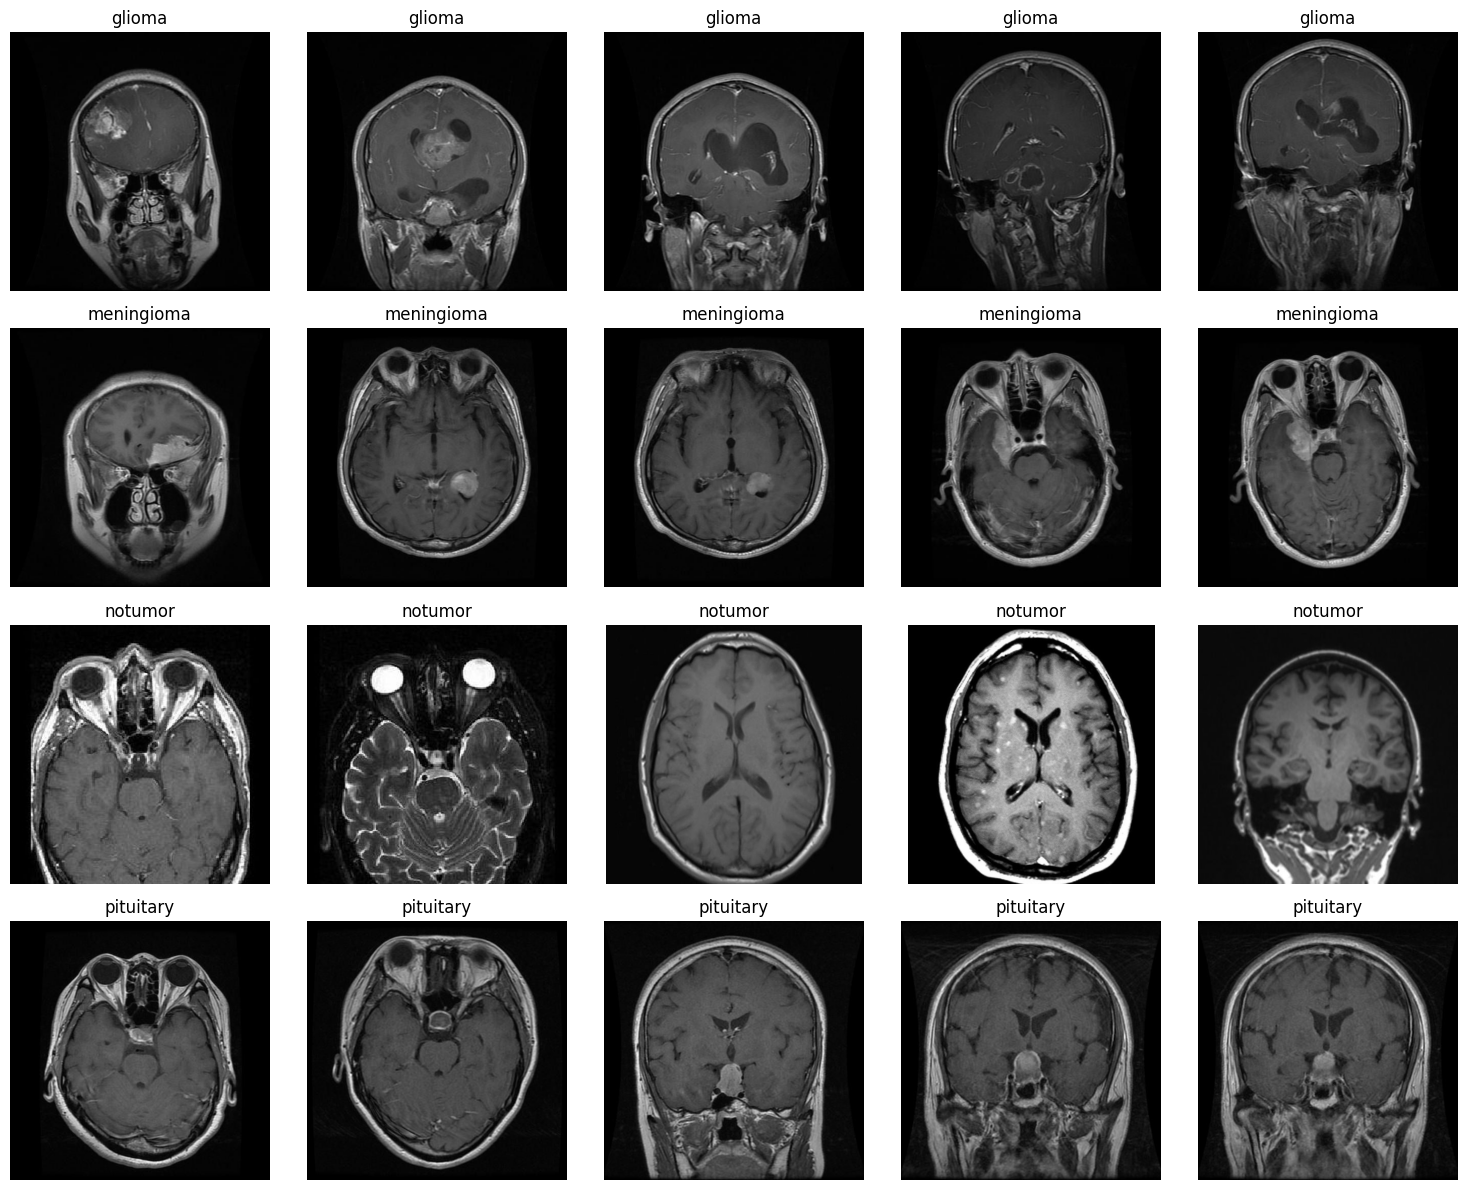

In [12]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [14]:
df = df[['image_path', 'category_encoded']]

In [15]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [18]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [19]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    6380
1    6380
2    6380
3    6380
Name: count, dtype: int64


In [20]:
df_resampled

,image_path,category_encoded
0,C:/Users/ae154/Downloads/BrainTumor_1/Train\gl...,0
1,C:/Users/ae154/Downloads/BrainTumor_1/Train\gl...,0
2,C:/Users/ae154/Downloads/BrainTumor_1/Train\gl...,0
3,C:/Users/ae154/Downloads/BrainTumor_1/Train\gl...,0
4,C:/Users/ae154/Downloads/BrainTumor_1/Train\gl...,0
...,...,...
25515,C:/Users/ae154/Downloads/BrainTumor_1/Train\pi...,3
25516,C:/Users/ae154/Downloads/BrainTumor_1/Train\pi...,3
25517,C:/Users/ae154/Downloads/BrainTumor_1/Train\pi...,3
25518,C:/Users/ae154/Downloads/BrainTumor_1/Train\pi...,3


In [21]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [22]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [23]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 20416 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_mobilenet_model(input_shape):

    inputs = Input(shape=input_shape)
  
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 1024  
    x = Reshape((height * width, channels))(x)
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [29]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 4633s 4s/step - accuracy: 0.8490 - loss: 0.4250 - val_accuracy: 0.9063 - val_loss: 0.2828
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 4578s 4s/step - accuracy: 0.9403 - loss: 0.1743 - val_accuracy: 0.9549 - val_loss: 0.1391
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 4624s 4s/step - accuracy: 0.9648 - loss: 0.1068 - val_accuracy: 0.9436 - val_loss: 0.1835
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 4573s 4s/step - accuracy: 0.9731 - loss: 0.0776 - val_accuracy: 0.9467 - val_loss: 0.1956
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 4474s 4s/step - accuracy: 0.9809 - loss: 0.0609 - val_accuracy: 0.9773 - val_loss: 0.0837


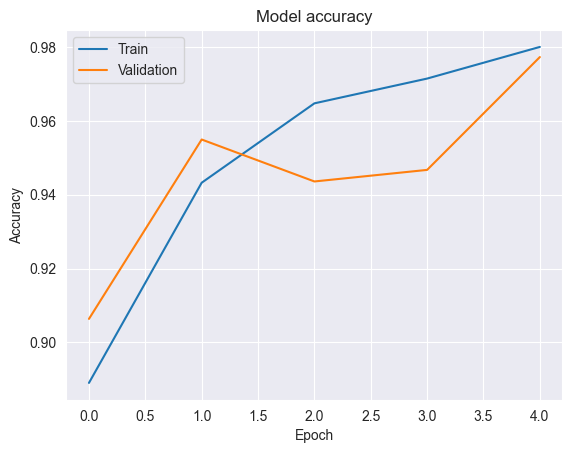

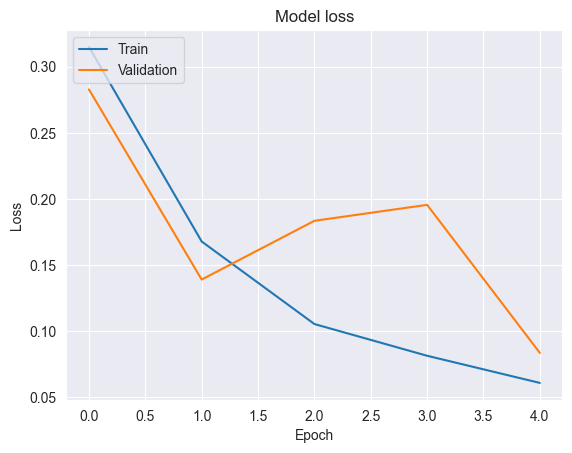

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step


In [32]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       638
           1       0.97      0.95      0.96       638
           2       0.98      0.99      0.99       638
           3       0.98      0.98      0.98       638

    accuracy                           0.98      2552
   macro avg       0.98      0.98      0.98      2552
weighted avg       0.98      0.98      0.98      2552



In [33]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

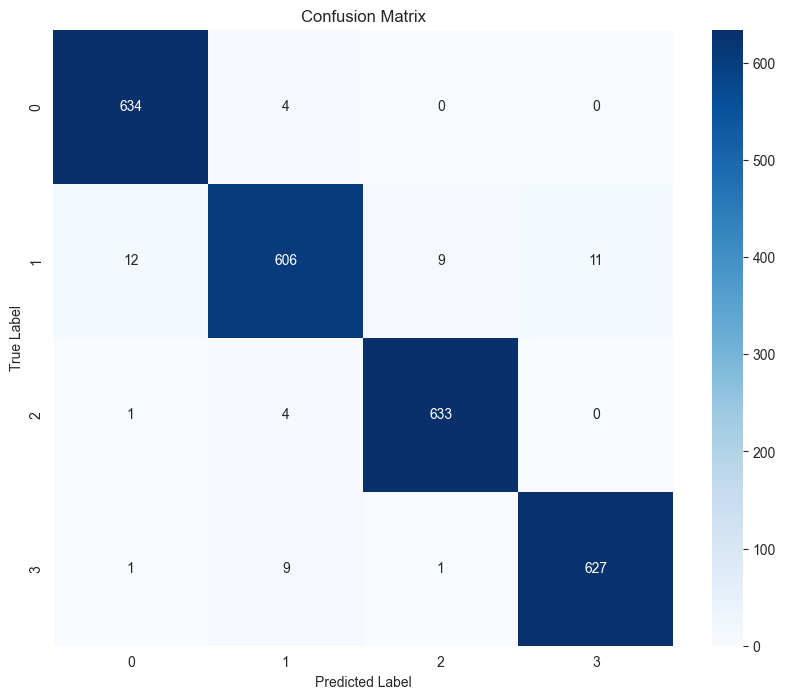

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
cnn_model.save("mobilenet_trained_model.h5")